In [82]:
import matplotlib.pyplot as plt
import pandas as pa
import numpy as np
import seaborn as sn
#Idée à retenir : on normalise loi normal puis on trace la reg lin yn = cov(nx,ny)*xn trouver la droite des normalisés
#afin d'obtenir a la fin Y = aX + b a = rho*sY/sX et b = mY-mx*a

In [4]:
T = pa.read_csv('criquets.csv')
T['YCelsius'] = (T['Y']-32)*5/9
# X nb de stridulations d'un criquet par minute et Y température en farenheit
T

,X,Y,YCelsius
0,20.000000,88.599998,31.444444
1,16.000000,71.599998,21.999999
2,19.799999,93.300003,34.055557
3,18.400000,84.300003,29.055557
4,17.100000,80.599998,26.999999
5,15.500000,75.199997,23.999998
6,14.700000,69.699997,20.944443
7,17.100000,82.000000,27.777778
8,15.400000,69.400002,20.777779
9,16.200001,83.300003,28.500002


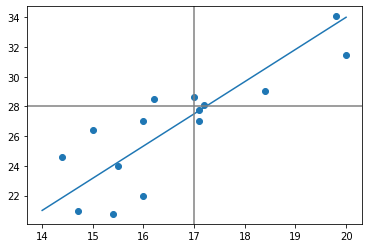

In [14]:
plt.scatter(x= T['X'],y=T['YCelsius'])
#tracer juste une droite plt.plot([14, 20], [21, 34])
plt.axhline(y = 28,color = 'gray')
plt.axvline(x = 17,color = 'gray')
#remarque la droite est a pente positive donc on voit que la covariance est positive (si nul ça fait une parabole)

In [20]:
mX = T.mean()[0]
mY = T.mean()[2]
sX = T.std(ddof=0)[0]
sY = T.std(ddof=0)[2]

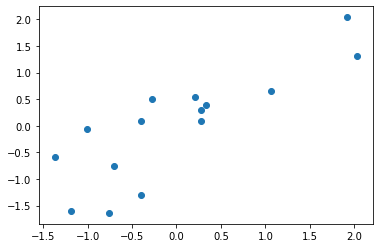

In [29]:
#la droite de regession lineaire passe par le G le point moyen de coordonnée (mX,mY)
#créeons la loi normale sur X et Y comme ça le coef de corrélation vaut rho = cov(NX,NY)
T['NX'] = (T['X']-mX)/sX
T['NY'] = (T['YCelsius']-mY)/sY
plt.scatter(x= T['NX'],y=T['NY'])
cov = (T['NX']*T['NY']).mean()

In [48]:
#Objectif ici est de rendre rm= somme de (yi-mxi)**2 le plus faible pour que la droite y = mx ajuste au mieux 
#le nuage de point de coordonnée (xi,yi) -> regression lineaire 1

def R(m) :
    carre = (T['NY']-m*T['NX'])**2
    return carre.sum()

def min(liste):
    min = liste[0]
    ind = 0
    longueur=len(liste)
    for i in range(longueur):
        if liste[i] <= min:
            min = liste[i]
            ind += 1
    return min, ind

m = list(np.linspace(0,2,50))
L = []
for element in m:
    L.append(R(element))

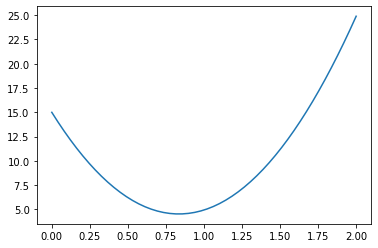

In [40]:
plt.plot(m,L)
#R est quadratique idée à avoir toujours essayer de tracer les focntions qu'on veut minimiser
#par le calcul en derivant R(m) on a que le minimum est atteint en rho le coeff de corélation 


In [50]:
#trouver la covariance par le minimum de la fonction 
indice = min(L)[1]
cov1 = m[indice]

In [51]:
cov,cov1
#la différence provient certainement du nombre de point pris dans m, on choisira la première solution plus précise

(0.8351437870311553, 0.8571428571428571)

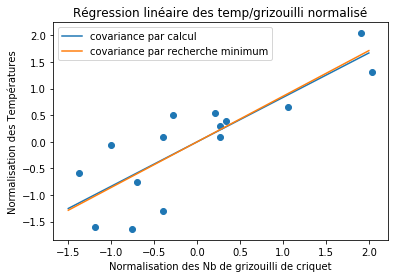

In [58]:
#verification de la droite regression linéaire y =rho*x correspond à ce que l'on veut 
#important a retenir pour tracer la regression lineaire, trouver Nx Ny, puis tracer y =cov(Nx,Ny)*x
plt.scatter(x= T['NX'],y=T['NY'])
x = np.linspace(-1.5,2)
plt.plot(x, x*cov, label='covariance par calcul')
plt.plot(x,x*cov1,label='covariance par recherche minimum')
plt.xlabel('Normalisation des Nb de grizouilli de criquet')
plt.ylabel('Normalisation des Températures')
plt.title('Régression linéaire des temp/grizouilli normalisé')
plt.legend()

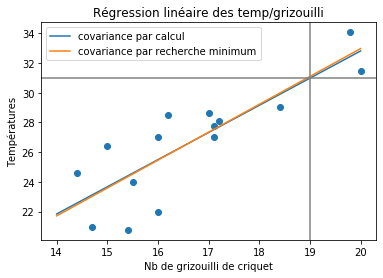

In [64]:
#par le calcul en remplaçant les vrais valeurs de la normalisation on a y = sy*rho/sx (x-mx) +my
plt.scatter(x= T['X'],y=T['YCelsius'])
x = np.linspace(14,20)
plt.plot(x, (x-mX)*sY*cov/sX+mY, label='covariance par calcul')
plt.plot(x,(x-mX)*sY*cov1/sX+mY,label='covariance par recherche minimum')
plt.xlabel('Nb de grizouilli de criquet')
plt.ylabel('Températures')
plt.title('Régression linéaire des temp/grizouilli')
plt.axvline(x = 19,color = 'gray')
plt.axhline(y = 31,color = 'gray')
plt.legend()

In [76]:
a = sY*cov/sX
b = mY-mX*a

Ainsi on peut voir qu'il existe une corrélation positive entre la température et le nombre de grizouilli des criquets l'hypothèse ne semble pas fausse on peut envisager l'approximation ainsi si on entends 19 grizouilli par minutes, on peut envisager qu'il fasse 31 degrés celsius.

In [80]:
#Calcul d'erreurs
#pour approximier Yi à Ym on fait l'erreur :
E1 = ((T['YCelsius']-mY)**2).sum()
#erreur Yi par aXi +b
E2 = ((T['YCelsius']-(a*T['X']+b))**2).sum()
#on effectue une diminution de l'erreur d'un pourcentage de :
dim = (E1-E2)/E1
#ce qui est équivalent environ à rho**2 IMPORTANT A RETENIR AU LIEU APPROX Yi PAR YM ON APPROX PAR REG LIN
dim, cov**2

(0.69746514501674, 0.6974651450167397)

In [81]:
pa.crosstab(T['X'],T['YCelsius'])

YCelsius,20.777779,20.944443,21.999999,23.999998,24.611113,26.444444,26.999999,27.777778,28.111110,28.500002,28.611111,29.055557,31.444444,34.055557
X,,,,,,,,,,,,,,
14.400000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14.700000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0
15.400000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15.500000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,0
16.200001,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17.100000,0,0,0,0,0,0,1,1,0,0,0,0,0,0


AINSI ON RETIENDRA QUE ON DIMINUE PAR APPROX REG LIN LAPPROX BASIQUE PAR LA MOYENNE DE RHO**2 ET POUR QUE LA REGRESSION LINEAIRE APPROXIME AU MIEU, IL VAUT MIEUX QUE RHO**2 SOIT PROCHE DE 1 (qualité si abs(rho) supérieur à 0.7)
CETTE APPROX REG LIN EST PERTINENTE QUE SI LE NUAGE DE POINT EST LINEAIRE

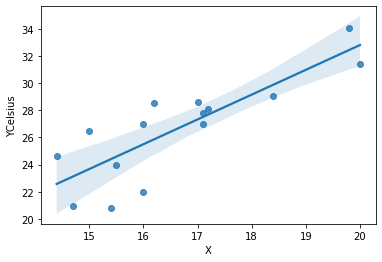

In [84]:
#Remarque en fait on peut le faire direct avec le module seaborn 
sn.regplot(x="X",y = "YCelsius", data = T, ci=95)